In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/benign-bow.csv', 'r') as f:
    benign_bow_data = list(csv.reader(f, delimiter=","))
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/benign-count.csv', 'r') as f:
    benign_count_data = list(csv.reader(f, delimiter=","))
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/malicious-bow.csv', 'r') as f:
    malicious_bow_data = list(csv.reader(f, delimiter=","))
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/malicious-count.csv', 'r') as f:
    malicious_count_data = list(csv.reader(f, delimiter=","))

In [2]:
benign_bow_data = np.array(benign_bow_data[1:], dtype=np.float)
benign_count_data = np.array(benign_count_data[1:], dtype=np.float)

In [3]:
malicious_bow_data = np.array(malicious_bow_data[1:], dtype=np.float)
malicious_count_data = np.array(malicious_count_data[1:], dtype=np.float)

In [4]:
benign_bow_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
benign_bow_data.shape

(4180, 84)

In [6]:
benign_count_data

array([[103.,   0.,  28., 131.],
       [ 93.,   0.,  15., 108.],
       [ 59.,   0.,  14.,  73.],
       ...,
       [  9.,   0.,   1.,  10.],
       [ 80.,   0.,  17.,  97.],
       [ 36.,   0.,   6.,  42.]])

In [7]:
benign_data=np.concatenate([benign_bow_data, benign_count_data], axis=1)

In [8]:
benign_data.shape

(4180, 88)

In [9]:
benign_target=[0] * benign_data.shape[0]
benign_data=np.hstack((benign_data, np.atleast_2d(benign_target).T))
benign_data.shape

(4180, 89)

In [10]:
malicious_data=np.concatenate([malicious_bow_data, malicious_count_data], axis=1)

In [11]:
malicious_target=[1] * malicious_data.shape[0]
malicious_data=np.hstack((malicious_data, np.atleast_2d(malicious_target).T))
malicious_data

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.5000e+01, 1.4300e+02,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5000e+01, 8.4952e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.7000e+01, 4.7000e+01,
        1.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.9000e+01, 6.9000e+01,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.2500e+02, 2.4300e+02,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.9000e+01, 6.9000e+01,
        1.0000e+00]])

In [12]:
all_comments = np.concatenate((benign_data, malicious_data), axis=0)

In [13]:
all_comments

array([[  0.,   0.,   0., ...,  28., 131.,   0.],
       [  0.,   1.,   0., ...,  15., 108.,   0.],
       [  0.,   1.,   0., ...,  14.,  73.,   0.],
       ...,
       [  0.,   0.,   0., ...,  29.,  69.,   1.],
       [  1.,   0.,   0., ..., 125., 243.,   1.],
       [  0.,   0.,   0., ...,  29.,  69.,   1.]])

In [14]:
feature_names = np.array(['<?php','and','or','xor','__TRAIT__','__FILE__','__DIR__','__NAMESPACE__',
                'exception','__LINE__','array','as','break','case',
               'class','const','continue','declare','default','die','do','echo','else','elseif',
               'empty','enddeclare','endfor','endforeach','endif','endswitch','endwhile','eval','exit','extends',
               'for','foreach','function','global','if','include','include_once','isset','list',
               'new','print','require','require_once','return','static','switch','unset',
               'use','var','while','__FUNCTION__','__CLASS__','__METHOD__','final','php_user_filter',
               'interface','implements','public','private','protected','abstract',
               'clone','try','catch','throw','cfunction','old_function','this','file_put_contents',
               'file_get_contents','assert','__construct','=>','(',')','_POST','_GET', 'base64_decode',
               'insteadof','goto', 'alpha', 'numbers', 'splchars', 'totalChars', 'benign_mal'])

In [15]:
feature_names.shape

(89,)

In [16]:
php_kw_dataset = {'data': all_comments, 'feature_names': feature_names}

In [17]:
php_kw_dataset.keys()

dict_keys(['data', 'feature_names'])

In [18]:
php_kw_dataset['feature_names'].shape

(89,)

In [19]:
php_kw_dataset['data'].shape

(4872, 89)

In [20]:
php_kw_df = pd.DataFrame(php_kw_dataset['data'], columns=php_kw_dataset['feature_names'])
php_kw_df.tail()

<?php  and   or  xor  __TRAIT__  __FILE__  __DIR__  __NAMESPACE__  \
4867    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4868    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4869    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4870    1.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4871    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   

      exception  __LINE__  ...  _POST  _GET  base64_decode  insteadof  goto  \
4867        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4868        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4869        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4870        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4871        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   

      alpha  numbers  splchars  totalChars  benign_mal  
4867   30.0      6.0      32.0        68.0         1.0  
4868    9.0      0.0      15.0        24.0         1.0  
4869   40.0      0.0      29.0        69.0         1.0  
4870  115.0      3.0     125.0       243.0         1.0  
4871   40.0      0.0      29.0        69.0         1.0  

[5 rows x 89 columns]

In [21]:
php_kw_dataset.values()

dict_values([array([[  0.,   0.,   0., ...,  28., 131.,   0.],
       [  0.,   1.,   0., ...,  15., 108.,   0.],
       [  0.,   1.,   0., ...,  14.,  73.,   0.],
       ...,
       [  0.,   0.,   0., ...,  29.,  69.,   1.],
       [  1.,   0.,   0., ..., 125., 243.,   1.],
       [  0.,   0.,   0., ...,  29.,  69.,   1.]]), array(['<?php', 'and', 'or', 'xor', '__TRAIT__', '__FILE__', '__DIR__',
       '__NAMESPACE__', 'exception', '__LINE__', 'array', 'as', 'break',
       'case', 'class', 'const', 'continue', 'declare', 'default', 'die',
       'do', 'echo', 'else', 'elseif', 'empty', 'enddeclare', 'endfor',
       'endforeach', 'endif', 'endswitch', 'endwhile', 'eval', 'exit',
       'extends', 'for', 'foreach', 'function', 'global', 'if', 'include',
       'include_once', 'isset', 'list', 'new', 'print', 'require',
       'require_once', 'return', 'static', 'switch', 'unset', 'use',
       'var', 'while', '__FUNCTION__', '__CLASS__', '__METHOD__', 'final',
       'php_user_filter',

In [22]:
php_kw_df['benign_mal']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4867    1.0
4868    1.0
4869    1.0
4870    1.0
4871    1.0
Name: benign_mal, Length: 4872, dtype: float64

In [23]:
php_kw_df.isnull().sum()

<?php         0
and           0
or            0
xor           0
__TRAIT__     0
             ..
alpha         0
numbers       0
splchars      0
totalChars    0
benign_mal    0
Length: 89, dtype: int64

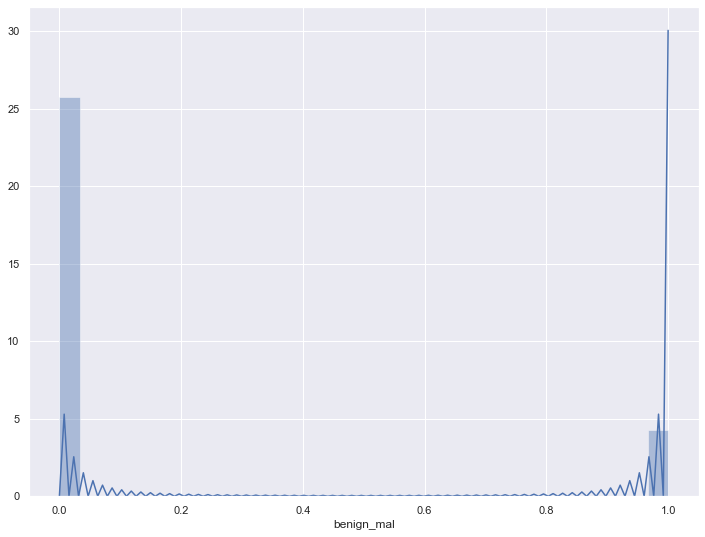

In [24]:
# set the size of the figure
sns.set(rc={'figure.figsize':(12, 9)})

# plot a histogram showing the distribution of the target (benign_mal) values
sns.distplot(php_kw_df['benign_mal'], bins=30)
plt.show()

In [25]:
# compute the pair wise correlation for all columns  
correlation_matrix = php_kw_df.corr().round(2)
correlation_matrix = correlation_matrix.fillna(0.999)
correlation_matrix

<?php    and     or    xor  __TRAIT__  __FILE__  __DIR__  \
<?php       1.000 -0.090 -0.040  0.999      0.999     0.999    0.999   
and        -0.090  1.000  0.210  0.999      0.999     0.999    0.999   
or         -0.040  0.210  1.000  0.999      0.999     0.999    0.999   
xor         0.999  0.999  0.999  0.999      0.999     0.999    0.999   
__TRAIT__   0.999  0.999  0.999  0.999      0.999     0.999    0.999   
...           ...    ...    ...    ...        ...       ...      ...   
alpha      -0.050  0.160  0.070  0.999      0.999     0.999    0.999   
numbers    -0.020 -0.030 -0.020  0.999      0.999     0.999    0.999   
splchars   -0.010  0.530  0.240  0.999      0.999     0.999    0.999   
totalChars -0.020 -0.010 -0.010  0.999      0.999     0.999    0.999   
benign_mal  0.550 -0.160 -0.080  0.999      0.999     0.999    0.999   

            __NAMESPACE__  exception  __LINE__  ...  _POST   _GET  \
<?php               0.999     -0.010     0.999  ... -0.010  0.999   
and                 0.999     -0.010     0.999  ... -0.030  0.999   
or                  0.999     -0.000     0.999  ... -0.010  0.999   
xor                 0.999      0.999     0.999  ...  0.999  0.999   
__TRAIT__           0.999      0.999     0.999  ...  0.999  0.999   
...                   ...        ...       ...  ...    ...    ...   
alpha               0.999      0.000     0.999  ...  0.000  0.999   
numbers             0.999     -0.000     0.999  ... -0.010  0.999   
splchars            0.999      0.040     0.999  ...  0.080  0.999   
totalChars          0.999     -0.000     0.999  ... -0.000  0.999   
benign_mal          0.999      0.060     0.999  ...  0.160  0.999   

            base64_decode  insteadof   goto  alpha  numbers  splchars  \
<?php              -0.020      0.999  0.999 -0.050   -0.020    -0.010   
and                -0.030      0.999  0.999  0.160   -0.030     0.530   
or                 -0.020      0.999  0.999  0.070   -0.020     0.240   
xor                 0.999      0.999  0.999  0.999    0.999     0.999   
__TRAIT__           0.999      0.999  0.999  0.999    0.999     0.999   
...                   ...        ...    ...    ...      ...       ...   
alpha               0.080      0.999  0.999  1.000    0.940     0.270   
numbers            -0.010      0.999  0.999  0.940    1.000    -0.030   
splchars            0.210      0.999  0.999  0.270   -0.030     1.000   
totalChars          0.010      0.999  0.999  0.950    1.000     0.020   
benign_mal          0.210      0.999  0.999  0.200    0.220     0.170   

            totalChars  benign_mal  
<?php           -0.020       0.550  
and             -0.010      -0.160  
or              -0.010      -0.080  
xor              0.999       0.999  
__TRAIT__        0.999       0.999  
...                ...         ...  
alpha            0.950       0.200  
numbers          1.000       0.220  
splchars         0.020       0.170  
totalChars       1.000       0.220  
benign_mal       0.220       1.000  

[89 rows x 89 columns]

In [26]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.subplots(figsize=(30,40))
sns.heatmap(data=correlation_matrix, annot=True)

In [27]:
correlation_matrix['benign_mal'].min()

-0.16

In [28]:
from sys import maxsize
from numpy import set_printoptions

set_printoptions(threshold=maxsize)

correlation_matrix

<?php    and     or    xor  __TRAIT__  __FILE__  __DIR__  \
<?php       1.000 -0.090 -0.040  0.999      0.999     0.999    0.999   
and        -0.090  1.000  0.210  0.999      0.999     0.999    0.999   
or         -0.040  0.210  1.000  0.999      0.999     0.999    0.999   
xor         0.999  0.999  0.999  0.999      0.999     0.999    0.999   
__TRAIT__   0.999  0.999  0.999  0.999      0.999     0.999    0.999   
...           ...    ...    ...    ...        ...       ...      ...   
alpha      -0.050  0.160  0.070  0.999      0.999     0.999    0.999   
numbers    -0.020 -0.030 -0.020  0.999      0.999     0.999    0.999   
splchars   -0.010  0.530  0.240  0.999      0.999     0.999    0.999   
totalChars -0.020 -0.010 -0.010  0.999      0.999     0.999    0.999   
benign_mal  0.550 -0.160 -0.080  0.999      0.999     0.999    0.999   

            __NAMESPACE__  exception  __LINE__  ...  _POST   _GET  \
<?php               0.999     -0.010     0.999  ... -0.010  0.999   
and                 0.999     -0.010     0.999  ... -0.030  0.999   
or                  0.999     -0.000     0.999  ... -0.010  0.999   
xor                 0.999      0.999     0.999  ...  0.999  0.999   
__TRAIT__           0.999      0.999     0.999  ...  0.999  0.999   
...                   ...        ...       ...  ...    ...    ...   
alpha               0.999      0.000     0.999  ...  0.000  0.999   
numbers             0.999     -0.000     0.999  ... -0.010  0.999   
splchars            0.999      0.040     0.999  ...  0.080  0.999   
totalChars          0.999     -0.000     0.999  ... -0.000  0.999   
benign_mal          0.999      0.060     0.999  ...  0.160  0.999   

            base64_decode  insteadof   goto  alpha  numbers  splchars  \
<?php              -0.020      0.999  0.999 -0.050   -0.020    -0.010   
and                -0.030      0.999  0.999  0.160   -0.030     0.530   
or                 -0.020      0.999  0.999  0.070   -0.020     0.240   
xor                 0.999      0.999  0.999  0.999    0.999     0.999   
__TRAIT__           0.999      0.999  0.999  0.999    0.999     0.999   
...                   ...        ...    ...    ...      ...       ...   
alpha               0.080      0.999  0.999  1.000    0.940     0.270   
numbers            -0.010      0.999  0.999  0.940    1.000    -0.030   
splchars            0.210      0.999  0.999  0.270   -0.030     1.000   
totalChars          0.010      0.999  0.999  0.950    1.000     0.020   
benign_mal          0.210      0.999  0.999  0.200    0.220     0.170   

            totalChars  benign_mal  
<?php           -0.020       0.550  
and             -0.010      -0.160  
or              -0.010      -0.080  
xor              0.999       0.999  
__TRAIT__        0.999       0.999  
...                ...         ...  
alpha            0.950       0.200  
numbers          1.000       0.220  
splchars         0.020       0.170  
totalChars       1.000       0.220  
benign_mal       0.220       1.000  

[89 rows x 89 columns]

In [29]:
##for i in correlation_matrix['benign_mal']:
##    print (i)

pd.set_option('display.max_rows', correlation_matrix.shape[0]+1)

correlation_matrix['benign_mal']
    

<?php                0.550
and                 -0.160
or                  -0.080
xor                  0.999
__TRAIT__            0.999
__FILE__             0.999
__DIR__              0.999
__NAMESPACE__        0.999
exception            0.060
__LINE__             0.999
array                0.280
as                  -0.110
break               -0.020
case                -0.030
class               -0.020
const                0.999
continue            -0.030
declare              0.999
default              0.999
die                  0.160
do                  -0.090
echo                 0.070
else                 0.030
elseif               0.999
empty               -0.010
enddeclare           0.999
endfor               0.999
endforeach           0.999
endif                0.999
endswitch            0.999
endwhile             0.999
eval                 0.200
exit                 0.540
extends              0.999
for                 -0.150
foreach              0.999
function             0.110
g

In [30]:
php_kw_df.groupby('benign_mal').mean()

<?php       and       or  xor  __TRAIT__  __FILE__  __DIR__  \
benign_mal                                                                  
0.0         0.00000  0.691627  0.08445  0.0        0.0       0.0      0.0   
1.0         0.33815  0.000000  0.00000  0.0        0.0       0.0      0.0   

            __NAMESPACE__  exception  __LINE__  ...         )     _POST  _GET  \
benign_mal                                      ...                             
0.0                   0.0   0.000000       0.0  ...  0.195694  0.000000   0.0   
1.0                   0.0   0.004335       0.0  ...  3.287572  0.030347   0.0   

            base64_decode  insteadof  goto       alpha      numbers  \
benign_mal                                                            
0.0              0.000000        0.0   0.0  110.807656     0.331100   
1.0              0.052023        0.0   0.0  472.982659  3002.877168   

             splchars   totalChars  
benign_mal                          
0.0         30.935646   142.074402  
1.0         58.486994  3534.346821  

[2 rows x 88 columns]

In [31]:
##correlation_matrix.sort_values("benign_mal", inplace = True)
corr_target = abs(correlation_matrix['benign_mal'])


##filter1 = feature_sel["benign_mal"]>= 0.0  

  
# filtering data on basis of both filters 
##feature_sel.where(filter1, inplace = True)
selected_feature=corr_target[corr_target>0.05]
selected_feature

<?php                0.550
and                  0.160
or                   0.080
xor                  0.999
__TRAIT__            0.999
__FILE__             0.999
__DIR__              0.999
__NAMESPACE__        0.999
exception            0.060
__LINE__             0.999
array                0.280
as                   0.110
const                0.999
declare              0.999
default              0.999
die                  0.160
do                   0.090
echo                 0.070
elseif               0.999
enddeclare           0.999
endfor               0.999
endforeach           0.999
endif                0.999
endswitch            0.999
endwhile             0.999
eval                 0.200
exit                 0.540
extends              0.999
for                  0.150
foreach              0.999
function             0.110
include_once         0.999
isset                0.999
require_once         0.999
unset                0.999
var                  0.090
__FUNCTION__         0.999
_

In [32]:
selected_feature.index

Index(['<?php', 'and', 'or', 'xor', '__TRAIT__', '__FILE__', '__DIR__',
       '__NAMESPACE__', 'exception', '__LINE__', 'array', 'as', 'const',
       'declare', 'default', 'die', 'do', 'echo', 'elseif', 'enddeclare',
       'endfor', 'endforeach', 'endif', 'endswitch', 'endwhile', 'eval',
       'exit', 'extends', 'for', 'foreach', 'function', 'include_once',
       'isset', 'require_once', 'unset', 'var', '__FUNCTION__', '__CLASS__',
       '__METHOD__', 'php_user_filter', 'implements', 'abstract', 'clone',
       'cfunction', 'old_function', 'this', 'file_put_contents',
       'file_get_contents', 'assert', '__construct', '=>', '(', ')', '_POST',
       '_GET', 'base64_decode', 'insteadof', 'goto', 'alpha', 'numbers',
       'splchars', 'totalChars', 'benign_mal'],
      dtype='object')